# Lab | Classification, Handling Imbalanced Data

<b>TASK:</b> Identify customers that are more likely to default/churn and thus prevent losses from such customers.<br>
Using historical customer data from an internet service provider 

In [93]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [94]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")
churnData.head()

# churn: Yes/No = target variable

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


### Preprocessing

In [95]:
churnData.rename(columns=lambda name:name.lower().replace(' ','_'), inplace=True)

In [96]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   object 
 15  churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [97]:
churnData.seniorcitizen.value_counts()
# seniorcitizen already dummy encoded (assume 1 as senior?)

seniorcitizen
0    5901
1    1142
Name: count, dtype: int64

In [98]:
churnData.contract.value_counts()

contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [99]:
# convert totalcharges column to numeric column
churnData.totalcharges = pd.to_numeric(churnData.totalcharges, errors='coerce')

In [100]:
# check for null values
churnData.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [101]:
# fill nas with mean
churnData.totalcharges = churnData.totalcharges.fillna(churnData.totalcharges.mean())

In [102]:
# check for duplicates and drop
churnData.duplicated().any()
churnData.drop_duplicates(inplace=True)

In [103]:
# encode the target variable
# churn_encoder = OrdinalEncoder(categories=[['No','Yes']])
# churnData['churn'] = churn_encoder.fit_transform(churnData[['churn']])

Use the following features: <b>tenure, SeniorCitizen, MonthlyCharges</b> and <b>TotalCharges</b>:
- Split the data into a training set and a test set.
- Scale the features either by using normalizer or a standard scaler.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [104]:
churnData.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


<b>Splitting the data

In [105]:
X = churnData[['tenure','seniorcitizen','monthlycharges','totalcharges']]
y = churnData[['churn']]

In [106]:
# train test split
TT_SPLIT = 0.2     
RAND_STATE = 99  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE) 

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'seniorcitizen'}>,
        <Axes: title={'center': 'monthlycharges'}>,
        <Axes: title={'center': 'totalcharges'}>]], dtype=object)

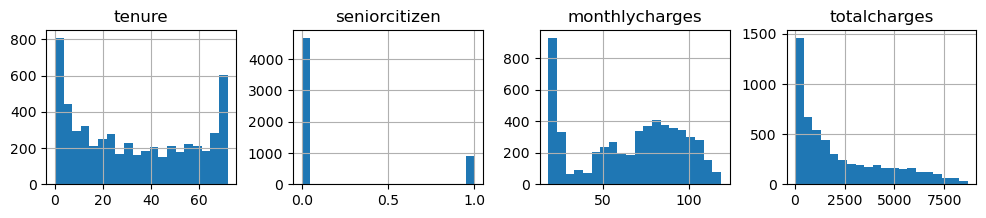

In [107]:
X_train.hist(bins=20, figsize=(12,2), layout=(1,4), sharex=False)

In [108]:
# transform the data using PowerTransformer because no gaussian distribution

pt = PowerTransformer()
pt.fit(X_train)

X_train = pt.transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = X.columns

X_test = pt.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

### Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [110]:
## NOT WORKING
log_model = LogisticRegression() 

log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
## NOT WORKING

/Users/jordanchiang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: pos_label=1 is not a valid label. It should be one of ['No', 'Yes']

### KNN Classification

In [113]:
knn_model = KNeighborsClassifier(n_neighbors=5,weights='uniform')
knn_model.fit(X_train, y_train) 
y_pred_knn = knn_model.predict(X_test.values) 
y_pred_train_knn = knn_model.predict(X_train.values)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_knn),
                                        precision_score(y_test, y_pred_knn),
                                        recall_score(y_test, y_pred_knn)]})

display(performance_log)

/Users/jordanchiang/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/jordanchiang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/jordanchiang/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: pos_label=1 is not a valid label. It should be one of ['No', 'Yes']

In [18]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [19]:
y_pred[0:5]

array([0, 0, 1, 0, 1])

In [20]:
y_test.head(5)

333    0
273    0
201    1
178    0
85     1
Name: target, dtype: int64

### Confusion matrices

Confusion matrices allow us to visualize how the model performs by showing how the predicted labels compare with the true (test) labels.
The false positives (upper right corners) and false negatives (lower left corners) impact the precision and recall scores.

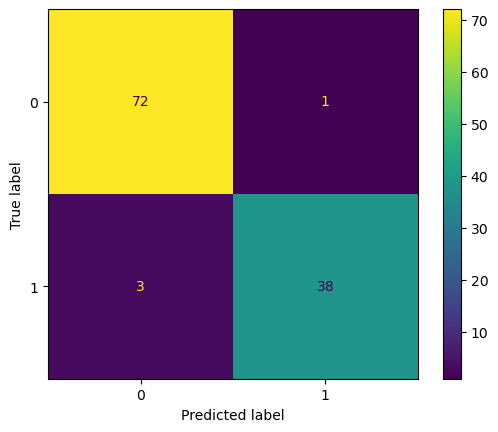

In [21]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

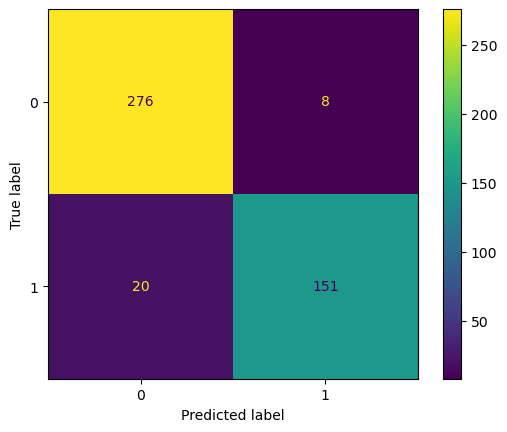

In [22]:
cm = confusion_matrix(y_train, y_pred_train, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Test results: 3 predictions where the model missed a malignant case and 1 case where the model predicted cancer where the was none.<br>
Train results: 20 predictions where the model misclassified malignant records and 8 cases where the model predicted a cancer where there was none.

### Performance Metrics

In [23]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test



In [24]:
## calling the function
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.94,0.96
1,Precision,0.95,0.97
2,Recall,0.88,0.93


In [25]:
y_train_vs_predicted # train labels

,Real,Predicted
190,1,1
134,1,1
386,0,0
118,1,1
316,0,0
...,...,...
98,0,0
322,0,0
382,0,0
365,1,1


In [26]:
y_test_vs_predicted # test labels

,Real,Predicted
333,0,0
273,0,0
201,1,1
178,0,0
85,1,1
...,...,...
179,0,0
192,0,0
246,0,0
211,0,0
